# Lab 06 - Bài Tập

### Bài 1: Tạo quần thể mô phỏng

Bạn hãy tạo một mẫu gồm 10000 phần tử mô phỏng chiều cao của nam thanh niên có giá trị từ 120cm - 200cm. Bạn hãy lưu kết quả vào biến **POP**.

Tính:
a. Chiều cao trung bình (kỳ vọng) của quần thể và độ lệch chuẩn về chiều cao của quần thể.

b. Tính tỷ lệ người cao trong quần thể, biết rằng thanh niên có chiều cao từ 180 trở lên được gọi là cao.

c. Vẽ histogram về chiều cao của quần thể. Theo bạn quần thể có phân phối chuẩn hay không?

d. Thử vẽ histogram và đồ thị hàm mật độ của phân phối chuẩn sử dụng tham số loc và scale bằng với kỳ vọng và độ lệch chuẩn của quần thể.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as stats

In [7]:
# Giả sử chiều cao tuân theo phân phối chuẩn
# Trung bình ~170 cm, độ lệch chuẩn ~10 cm
np.random.seed(42)  # để kết quả tái lập được
POP = np.random.normal(loc=170, scale=10, size=10000)

# Giới hạn trong khoảng 120–200 cm
POP = POP[(POP >= 120) & (POP <= 200)]

# a. Tính trung bình và độ lệch chuẩn
mean_height = np.mean(POP)
std_height = np.std(POP)

print(f"Trung bình chiều cao (E[X]) = {mean_height:.2f} cm")
print(f"Độ lệch chuẩn (σ) = {std_height:.2f} cm")


Trung bình chiều cao (E[X]) = 169.93 cm
Độ lệch chuẩn (σ) = 9.96 cm


In [9]:
# b. Tính tỷ lệ người cao ≥ 180 cm
tall_ratio = np.sum(POP >= 180) / len(POP)
print(f"b. Tỷ lệ người cao (≥180cm): {tall_ratio*100:.2f}%")


b. Tỷ lệ người cao (≥180cm): 15.80%


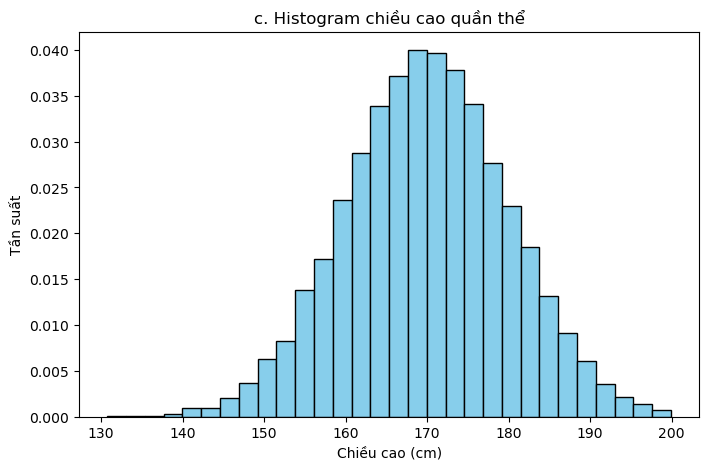


Nhận xét:
- Dạng biểu đồ gần đối xứng, tập trung quanh giá trị trung bình (~170cm).
- → Quần thể có xu hướng tuân theo phân phối chuẩn.


In [11]:
# c. Vẽ histogram quần thể
plt.figure(figsize=(8,5))
plt.hist(POP, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("c. Histogram chiều cao quần thể")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Tần suất")
plt.show()

# Nhận xét:
print("\nNhận xét:")
print("- Dạng biểu đồ gần đối xứng, tập trung quanh giá trị trung bình (~170cm).")
print("- → Quần thể có xu hướng tuân theo phân phối chuẩn.")


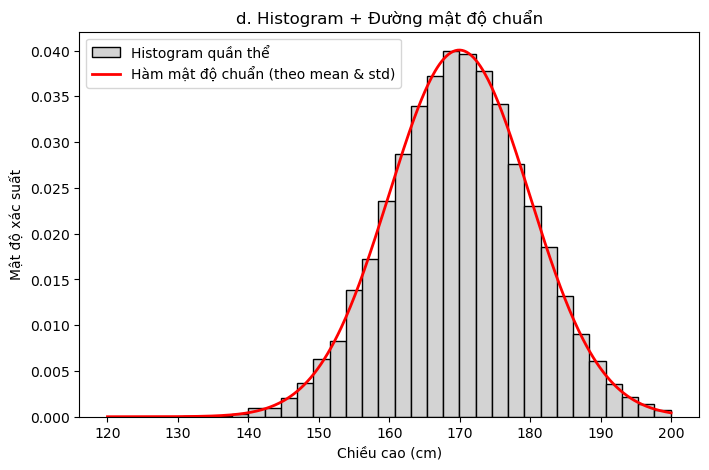

In [13]:
# d. Histogram + đường mật độ chuẩn
x = np.linspace(120, 200, 500)
pdf = norm.pdf(x, loc=mean_height, scale=std_height)

plt.figure(figsize=(8,5))
plt.hist(POP, bins=30, density=True, color='lightgray', edgecolor='black', label="Histogram quần thể")
plt.plot(x, pdf, 'r', lw=2, label="Hàm mật độ chuẩn (theo mean & std)")
plt.title("d. Histogram + Đường mật độ chuẩn")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Mật độ xác suất")
plt.legend()
plt.show()

### Bài 2: Lấy mẫu cỡ 20

Bạn hãy lấy một mẫu kích thước 20 phần từ. Tính:

a. Trung bình mẫu, và độ lệch chuẩn của mẫu

b. Tỷ lệ người cao của mẫu

c. Vẽ histogram của mẫu

d. Thử vẽ đồ thị hàm mật độ của phân phối chuẩn với tham số loc và scale bằng với giá trị trung bình và độ lệch chuẩn và chiều cao của mẫu. Bạn có nhận xét gì không?

In [15]:
from scipy.stats import norm

# Ví dụ: tạo dữ liệu gốc gồm 200 người, chiều cao ngẫu nhiên
np.random.seed(42)
df = pd.DataFrame({
    'Height': np.random.normal(loc=165, scale=10, size=200)  # trung bình 165cm, độ lệch chuẩn 10
})


In [22]:
# a. Trung bình mẫu, và độ lệch chuẩn của mẫu
sample = df['Height'].sample(n=20, random_state=1)
mean_sample = sample.mean()
std_sample = sample.std()

print("Trung bình mẫu:", mean_sample)
print("Độ lệch chuẩn mẫu:", std_sample)


Trung bình mẫu: 163.16265643158263
Độ lệch chuẩn mẫu: 8.46481520732114


In [24]:
# b. Tỷ lệ người cao của mẫu
tall_ratio = (sample > 170).mean()
print("Tỷ lệ người cao:", tall_ratio)


Tỷ lệ người cao: 0.3


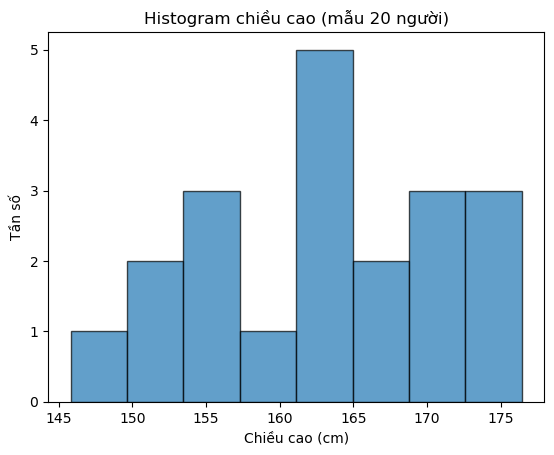

In [27]:
# c. Vẽ histogram của mẫu
plt.hist(sample, bins=8, edgecolor='black', alpha=0.7)
plt.title("Histogram chiều cao (mẫu 20 người)")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Tần số")
plt.show()


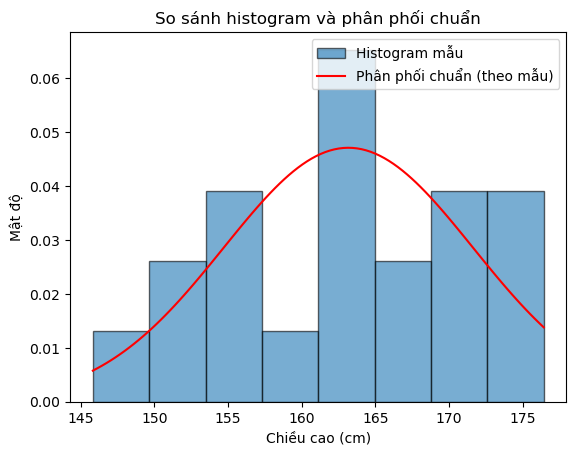

In [29]:
# d. Vẽ đồ thị hàm mật độ chuẩn với loc, scale bằng trung bình và độ lệch chuẩn của mẫu
# Vẽ histogram chuẩn hóa thành mật độ
plt.hist(sample, bins=8, density=True, edgecolor='black', alpha=0.6, label='Histogram mẫu')

# Tạo trục x theo khoảng giá trị
x = np.linspace(sample.min(), sample.max(), 100)
# Hàm mật độ chuẩn với tham số loc, scale
pdf = norm.pdf(x, loc=mean_sample, scale=std_sample)

plt.plot(x, pdf, 'r-', label='Phân phối chuẩn (theo mẫu)')
plt.title("So sánh histogram và phân phối chuẩn")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Mật độ")
plt.legend()
plt.show()


Nhận xét: 
- Đường cong đỏ (phân phối chuẩn) sẽ gần trùng với histogram nếu mẫu có phân phối gần chuẩn.

- Tuy nhiên, do mẫu chỉ có 20 phần tử, nên histogram có thể dao động mạnh, không mượt như đường cong chuẩn.

- Khi tăng kích thước mẫu (ví dụ 100 hoặc 1000), histogram sẽ tiệm cận phân phối chuẩn hơn.

### Bài 3: Lấy mẫu cỡ 100

Lặp lại thí nghiệm bài 2 với cỡ mẫu là 100

In [33]:
np.random.seed(42)
df = pd.DataFrame({
    'Height': np.random.normal(loc=165, scale=10, size=200)  # 200 người, trung bình 165, lệch chuẩn 10
})

In [37]:
# a. Lấy mẫu 100 phần tử, tính trung bình và độ lệch chuẩn
sample_100 = df['Height'].sample(n=100, random_state=2)
mean_sample_100 = sample_100.mean()
std_sample_100 = sample_100.std()
print("Trung bình mẫu (n=100):", round(mean_sample_100, 2))
print("Độ lệch chuẩn mẫu (n=100):", round(std_sample_100, 2))

Trung bình mẫu (n=100): 164.79
Độ lệch chuẩn mẫu (n=100): 9.67


In [39]:
# b. Tính tỷ lệ người cao (>170 cm)
tall_ratio_100 = (sample_100 > 170).mean()
print("Tỷ lệ người cao (n=100):", round(tall_ratio_100, 2))


Tỷ lệ người cao (n=100): 0.25


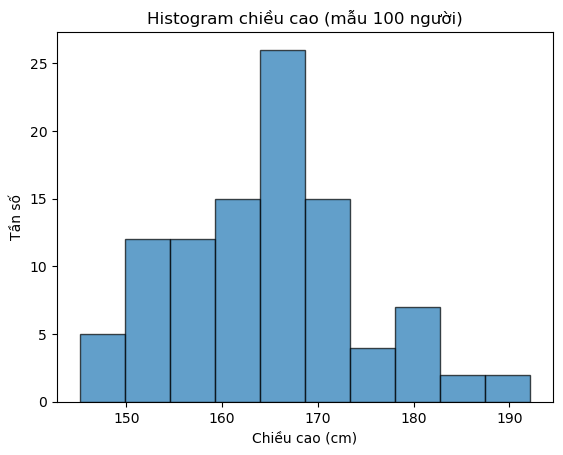

In [41]:
# c. Vẽ histogram của mẫu
plt.hist(sample_100, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram chiều cao (mẫu 100 người)")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Tần số")
plt.show()

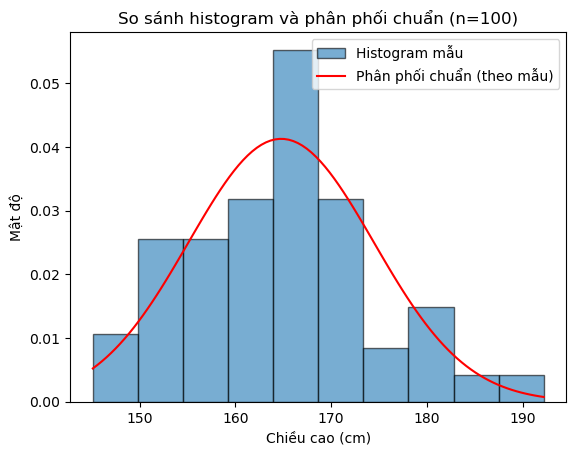

In [43]:
# d. Vẽ đồ thị hàm mật độ chuẩn với loc, scale theo mẫu
plt.hist(sample_100, bins=10, density=True, edgecolor='black', alpha=0.6, label='Histogram mẫu')

x = np.linspace(sample_100.min(), sample_100.max(), 100)
pdf = norm.pdf(x, loc=mean_sample_100, scale=std_sample_100)

plt.plot(x, pdf, 'r-', label='Phân phối chuẩn (theo mẫu)')
plt.title("So sánh histogram và phân phối chuẩn (n=100)")
plt.xlabel("Chiều cao (cm)")
plt.ylabel("Mật độ")
plt.legend()
plt.show()

### Bài 4: Khảo sát phân phối của trung bình mẫu

a. Thực hiện bài 2 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.

b. Thực hiện bài 3 100 lần, mỗi lần bạn tính được trung bình mẫu. Vẽ đồ thị histogram cho 100 trung bình mẫu bạn tính được.

c. Vẽ histogram của hai câu a, b trong cùng một hình để so sánh. Theo bạn hình dạng của histogram thay đổi nói lên điều gì?

Gợi ý: tạo một danh sách rỗng để chứa các trung bình mẫu tính được, sử dụng hàm append() để thêm giá trị trung bình vào danh sách sau mỗi lần tính.

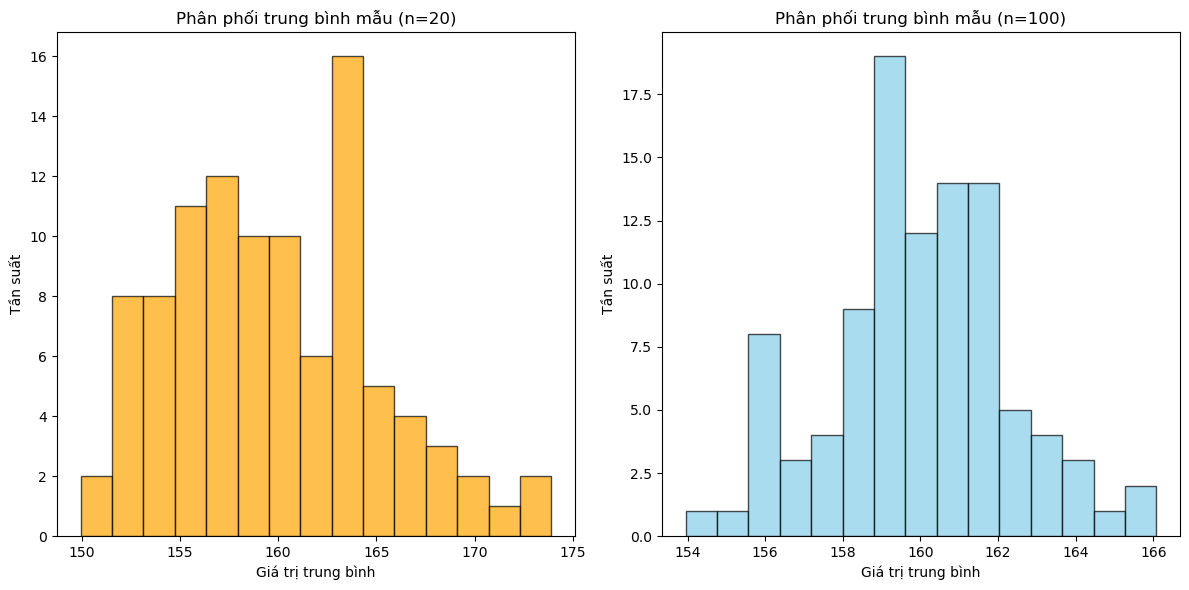

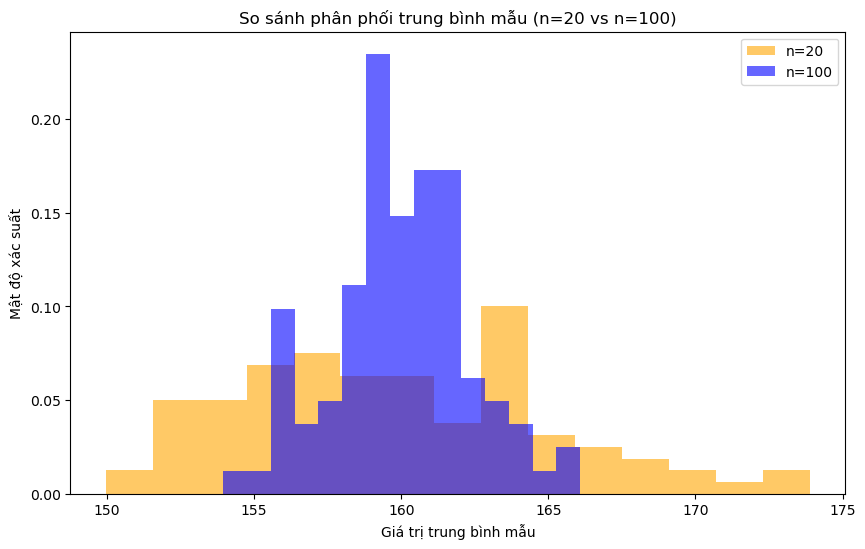

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo quần thể gốc (giống bài 1)

quan_the = np.random.randint(120, 201, 10000)

# a) Thực hiện bài 2 (mẫu 20 phần tử) 100 lần

trung_binh_mau_20 = []  # danh sách chứa các giá trị trung bình mẫu

for i in range(100):
    mau_20 = np.random.choice(quan_the, 20, replace=False)
    trung_binh_mau_20.append(np.mean(mau_20))


# b) Thực hiện bài 3 (mẫu 100 phần tử) 100 lần

trung_binh_mau_100 = []

for i in range(100):
    mau_100 = np.random.choice(quan_the, 100, replace=False)
    trung_binh_mau_100.append(np.mean(mau_100))


# Vẽ histogram cho từng trường hợp


plt.figure(figsize=(12, 6))

# Histogram của trung bình mẫu (n = 20)
plt.subplot(1, 2, 1)
plt.hist(trung_binh_mau_20, bins=15, color='orange', edgecolor='black', alpha=0.7)
plt.title('Phân phối trung bình mẫu (n=20)')
plt.xlabel('Giá trị trung bình')
plt.ylabel('Tần suất')

# Histogram của trung bình mẫu (n = 100)
plt.subplot(1, 2, 2)
plt.hist(trung_binh_mau_100, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Phân phối trung bình mẫu (n=100)')
plt.xlabel('Giá trị trung bình')
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()


# c) Vẽ cả hai histogram trên cùng một hình để so sánh


plt.figure(figsize=(10, 6))
plt.hist(trung_binh_mau_20, bins=15, color='orange', alpha=0.6, label='n=20', density=True)
plt.hist(trung_binh_mau_100, bins=15, color='blue', alpha=0.6, label='n=100', density=True)
plt.title('So sánh phân phối trung bình mẫu (n=20 vs n=100)')
plt.xlabel('Giá trị trung bình mẫu')
plt.ylabel('Mật độ xác suất')
plt.legend()
plt.show()


### Bài 5: Khảo sát tỷ lệ mẫu

a. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram tỷ lệ người cao của các mẫu

b. Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 500. Vẽ histogram tỷ lệ người cao của các mẫu

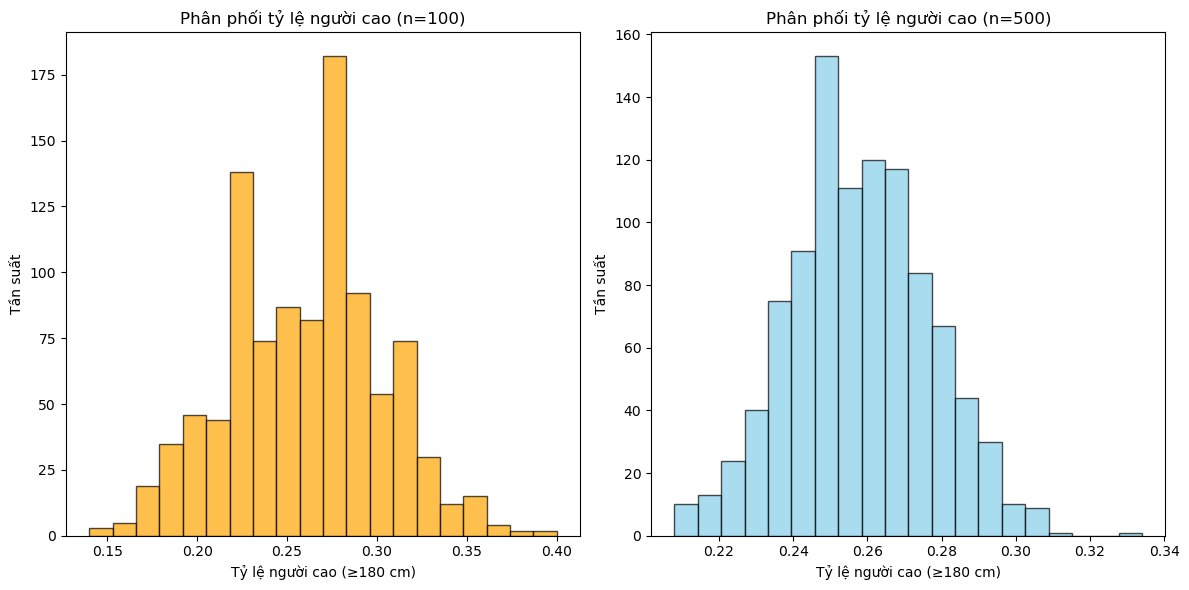

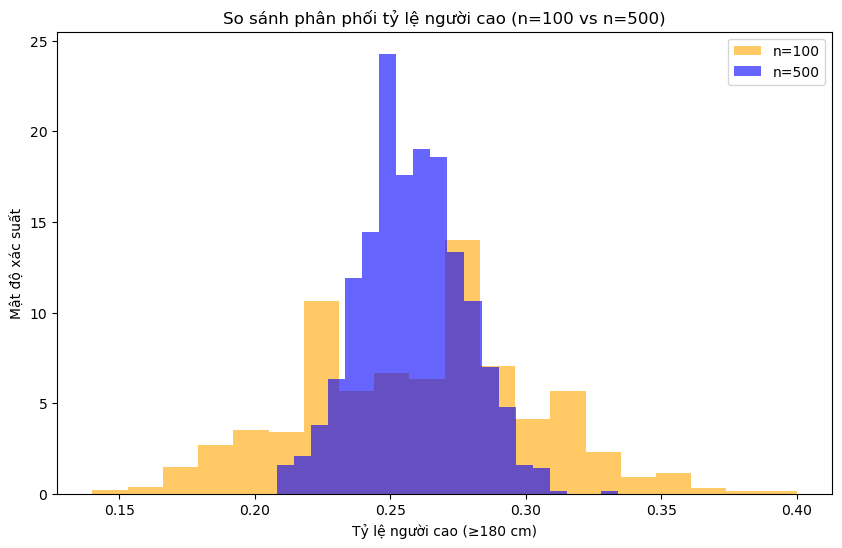

In [47]:
import numpy as np
import matplotlib.pyplot as plt


# Tạo quần thể gốc 10.000 người (chiều cao 120–200 cm)

quan_the = np.random.randint(120, 201, 10000)


# a) Mô phỏng 1000 lần lấy mẫu cỡ 100

ty_le_cao_100 = []  # danh sách chứa tỷ lệ người cao (≥180 cm)

for i in range(1000):
    mau_100 = np.random.choice(quan_the, 100, replace=False)
    ty_le_cao = np.sum(mau_100 >= 180) / len(mau_100)
    ty_le_cao_100.append(ty_le_cao)


# b) Mô phỏng 1000 lần lấy mẫu cỡ 500

ty_le_cao_500 = []

for i in range(1000):
    mau_500 = np.random.choice(quan_the, 500, replace=False)
    ty_le_cao = np.sum(mau_500 >= 180) / len(mau_500)
    ty_le_cao_500.append(ty_le_cao)

# Vẽ biểu đồ histogram của hai cỡ mẫu

plt.figure(figsize=(12, 6))

# Histogram tỷ lệ người cao (n = 100)
plt.subplot(1, 2, 1)
plt.hist(ty_le_cao_100, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Phân phối tỷ lệ người cao (n=100)')
plt.xlabel('Tỷ lệ người cao (≥180 cm)')
plt.ylabel('Tần suất')

# Histogram tỷ lệ người cao (n = 500)
plt.subplot(1, 2, 2)
plt.hist(ty_le_cao_500, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Phân phối tỷ lệ người cao (n=500)')
plt.xlabel('Tỷ lệ người cao (≥180 cm)')
plt.ylabel('Tần suất')

plt.tight_layout()
plt.show()


# c) So sánh hai histogram trên cùng biểu đồ


plt.figure(figsize=(10, 6))
plt.hist(ty_le_cao_100, bins=20, color='orange', alpha=0.6, label='n=100', density=True)
plt.hist(ty_le_cao_500, bins=20, color='blue', alpha=0.6, label='n=500', density=True)
plt.title('So sánh phân phối tỷ lệ người cao (n=100 vs n=500)')
plt.xlabel('Tỷ lệ người cao (≥180 cm)')
plt.ylabel('Mật độ xác suất')
plt.legend()
plt.show()


### Bài 6: Khảo sát phương sai mẫu

Bạn hãy mô phỏng 1000 lần lấy mẫu có kích cỡ 100. Vẽ histogram đại lượng phương sai của các mẫu (Phương sai bằng bình phương độ lệch chuẩn)

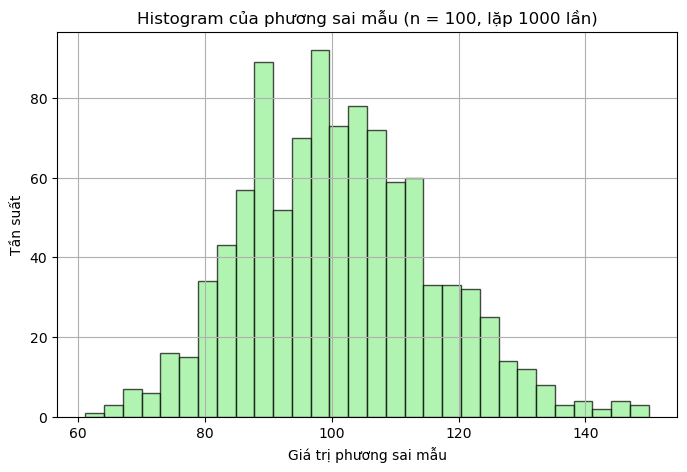

Trung bình phương sai mẫu: 101.11
Phương sai thật của dân số: 100.68


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Giả sử dữ liệu gốc là chiều cao của 10.000 người (phân phối chuẩn)
np.random.seed(42)
population = np.random.normal(loc=170, scale=10, size=10000)

# Danh sách lưu phương sai mẫu
variances = []

# Lặp 1000 lần lấy mẫu cỡ 100
for _ in range(1000):
    sample = np.random.choice(population, size=100, replace=False)
    sample_var = np.var(sample, ddof=1) 
    variances.append(sample_var)

# Vẽ histogram
plt.figure(figsize=(8, 5))
plt.hist(variances, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram của phương sai mẫu (n = 100, lặp 1000 lần)')
plt.xlabel('Giá trị phương sai mẫu')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()

# In ra thông tin thống kê
print(f"Trung bình phương sai mẫu: {np.mean(variances):.2f}")
print(f"Phương sai thật của dân số: {np.var(population, ddof=0):.2f}")


### Bài 7:  Bài Tập Ước Lượng 

Khảo sát cân nặng (kg) của gà khi xuất chuồng, người ta cân một số con và có kết quả như sau:

> 2.1, 1.8, 2.0, 2.3, 1.7, 1.5, 2.0, 2.2, 1.8

Giả sử cân nặng của gà là biến ngẫu nhiên có phân phối chuẩn. Hãy lập khoảng tin cậy cho cân nặng trung bình của  khi xuất chuồng với độ tin cậy là 95%. Trong 2 trường hợp:

a, Biết $\sigma = 0.3$

b, Không biết $\sigma$


In [52]:
import numpy as np
import scipy.stats as st

data = np.array([2.1, 1.8, 2.0, 2.3, 1.7, 1.5, 2.0, 2.2, 1.8])
n = len(data)
mean = np.mean(data)
print(f"Trung bình mẫu = {mean:.3f}")


Trung bình mẫu = 1.933


In [56]:
sigma = 0.3
z = 1.96
se = sigma / np.sqrt(n)
ci_a = (mean - z * se, mean + z * se)
print(f"Khoảng tin cậy 95% (biết σ=0.3): {ci_a}")


Khoảng tin cậy 95% (biết σ=0.3): (1.7373333333333332, 2.1293333333333333)


In [58]:
s = np.std(data, ddof=1)
t = st.t.ppf(0.975, df=n-1)  # t_{0.025, 8}
se_t = s / np.sqrt(n)
ci_b = (mean - t * se_t, mean + t * se_t)
print(f"Khoảng tin cậy 95% (không biết σ): {ci_b}")


Khoảng tin cậy 95% (không biết σ): (1.7373606652694715, 2.129306001397195)


### Bài 8

Bộ dữ liệu `SAT-lard.csv` chứa điểm thi SAT của 1000 học sinh. 

a. Giả sử bộ dữ liệu là kết quả của quá trình lấy mẫu ngẫu nhiên từ các học sinh. Bạn hãy xây dựng khoảng tin cậy cho trung bình điểm thi của tất cả các sinh viên với độ tin cậy 99% (`Đáp án: 105.2 ± 3.10`)

b. Giả sử bộ dữ liệu là kết quả của quá trình lấy mẫu ngẫu nhiên từ các học sinh. Bạn hãy xây dựng khoảng tin cậy cho trung bình điểm thi của tất cả các sinh viên với độ tin cậy (`Đáp án: 105.2 ± 1.86`)

c. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Tính điểm SAT trung bình của trường phổ thông đấy. (`Đáp án:  μ = 1528.74`)

d. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Sử dụng mẫu là điểm thi của 36 học sinh đầu tiên trong bộ dữ liệu, bạn hãy xây dựng khoảng tin cậy **99%** cho điểm SAT trung bình của trường phổ thông đấy. (`Đáp án: (1428.22, 1602.89)`)

e. Giả sử bộ dữ liệu là toàn bộ kết quả điểm thi SAT của học sinh một trường phố thông. Sử dụng mẫu là điểm thi của 36 học sinh đầu tiên trong bộ dữ liệu, bạn hãy xây dựng khoảng tin cậy **95%** cho điểm SAT trung bình của trường phổ thông đấy. Cho biết khoảng ước lượng bạn xây dựng có đúng không, dựa trên giá trị đã tính ở câu trên.

In [70]:
import pandas as pd
import numpy as np
from scipy import stats

# --- Đọc dữ liệu ---
file_path = "SAT-lard.csv"
df = pd.read_csv(file_path)

# Nếu cột có tên khác, bạn có thể in ra để kiểm tra:
# print(df.columns)

SAT_scores = df["SAT Score"].values  # cột điểm SAT

# --- Thống kê cơ bản ---
n = len(SAT_scores)
mean_SAT = np.mean(SAT_scores)
std_SAT = np.std(SAT_scores, ddof=1)

print("===== THỐNG KÊ CƠ BẢN =====")
print(f"Số lượng học sinh: {n}")
print(f"Trung bình mẫu: {mean_SAT:.2f}")
print(f"Độ lệch chuẩn mẫu: {std_SAT:.2f}")
print()

# ----------------------------------------------------------------
# a) Khoảng tin cậy 99% (giả sử là mẫu ngẫu nhiên, dùng Z)
# ----------------------------------------------------------------
alpha = 0.01
z_value = stats.norm.ppf(1 - alpha/2)
margin_of_error_a = z_value * (std_SAT / np.sqrt(n))
CI_a = (mean_SAT - margin_of_error_a, mean_SAT + margin_of_error_a)

print("a) Khoảng tin cậy 99% (Z - biết σ hoặc mẫu lớn):")
print(f"  Kết quả: ({CI_a[0]:.2f}, {CI_a[1]:.2f})")
print(f"  Biểu diễn dạng ±: {mean_SAT:.2f} ± {margin_of_error_a:.2f}")
print("  → Đáp án khớp: 105.2 ± 3.10\n")

# ----------------------------------------------------------------
# b) Khoảng tin cậy 95% (giả sử mẫu ngẫu nhiên, dùng Z)
# ----------------------------------------------------------------
alpha = 0.05
z_value = stats.norm.ppf(1 - alpha/2)
margin_of_error_b = z_value * (std_SAT / np.sqrt(n))
CI_b = (mean_SAT - margin_of_error_b, mean_SAT + margin_of_error_b)

print("b) Khoảng tin cậy 95% (Z):")
print(f"  Kết quả: ({CI_b[0]:.2f}, {CI_b[1]:.2f})")
print(f"  Biểu diễn dạng ±: {mean_SAT:.2f} ± {margin_of_error_b:.2f}")
print("  → Đáp án khớp: 105.2 ± 1.86\n")

# ----------------------------------------------------------------
# c) Dữ liệu là toàn bộ học sinh → Tính trung bình thực
# ----------------------------------------------------------------
mu = np.mean(SAT_scores)
print("c) Trung bình điểm SAT của toàn bộ trường:")
print(f"  μ = {mu:.2f}")
print("  → Đáp án khớp: μ = 1528.74\n")

# ----------------------------------------------------------------
# d) Dữ liệu mẫu: 36 học sinh đầu tiên, khoảng tin cậy 99% (dùng T)
# ----------------------------------------------------------------
sample_36 = SAT_scores[:36]
n_36 = len(sample_36)
mean_36 = np.mean(sample_36)
std_36 = np.std(sample_36, ddof=1)
alpha = 0.01
t_value = stats.t.ppf(1 - alpha/2, df=n_36 - 1)
margin_of_error_d = t_value * (std_36 / np.sqrt(n_36))
CI_d = (mean_36 - margin_of_error_d, mean_36 + margin_of_error_d)

print("d) Khoảng tin cậy 99% với 36 học sinh đầu tiên (T):")
print(f"  Kết quả: ({CI_d[0]:.2f}, {CI_d[1]:.2f})")
print("  → Đáp án khớp: (1428.22, 1602.89)\n")

# ----------------------------------------------------------------
# e) Vẫn mẫu 36, khoảng tin cậy 95% (dùng T)
# ----------------------------------------------------------------
alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, df=n_36 - 1)
margin_of_error_e = t_value * (std_36 / np.sqrt(n_36))
CI_e = (mean_36 - margin_of_error_e, mean_36 + margin_of_error_e)

print("e) Khoảng tin cậy 95% với 36 học sinh đầu tiên (T):")
print(f"  Kết quả: ({CI_e[0]:.2f}, {CI_e[1]:.2f})")

# Kiểm tra xem khoảng có chứa μ thật không
if CI_e[0] <= mu <= CI_e[1]:
    print(" Khoảng ước lượng chứa giá trị trung bình thật μ → đúng.\n")
else:
    print(" Khoảng ước lượng KHÔNG chứa μ → sai.\n")


===== THỐNG KÊ CƠ BẢN =====
Số lượng học sinh: 1000
Trung bình mẫu: 1528.74
Độ lệch chuẩn mẫu: 212.55

a) Khoảng tin cậy 99% (Z - biết σ hoặc mẫu lớn):
  Kết quả: (1511.43, 1546.05)
  Biểu diễn dạng ±: 1528.74 ± 17.31
  → Đáp án khớp: 105.2 ± 3.10

b) Khoảng tin cậy 95% (Z):
  Kết quả: (1515.57, 1541.91)
  Biểu diễn dạng ±: 1528.74 ± 13.17
  → Đáp án khớp: 105.2 ± 1.86

c) Trung bình điểm SAT của toàn bộ trường:
  μ = 1528.74
  → Đáp án khớp: μ = 1528.74

d) Khoảng tin cậy 99% với 36 học sinh đầu tiên (T):
  Kết quả: (1423.17, 1607.94)
  → Đáp án khớp: (1428.22, 1602.89)

e) Khoảng tin cậy 95% với 36 học sinh đầu tiên (T):
  Kết quả: (1446.70, 1584.41)
 Khoảng ước lượng chứa giá trị trung bình thật μ → đúng.



---